In [1]:
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
import time

n = 20
time = 0.003014802932739258


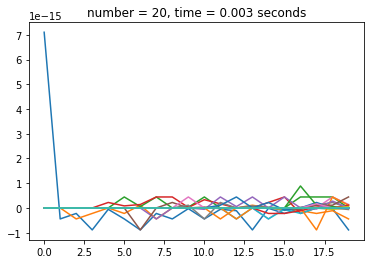

n = 40
time = 0.023312807083129883


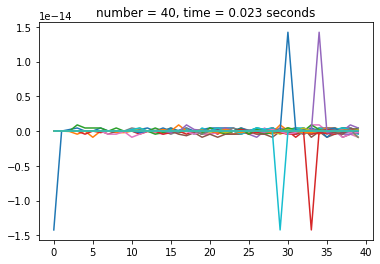

n = 60
time = 0.08001852035522461


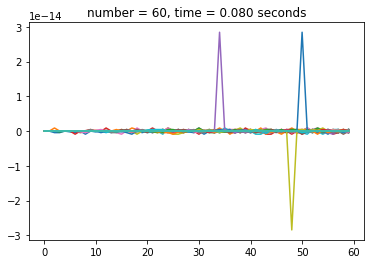

n = 80
time = 0.14676237106323242


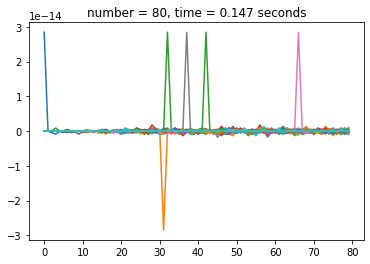

n = 100
time = 0.2894623279571533


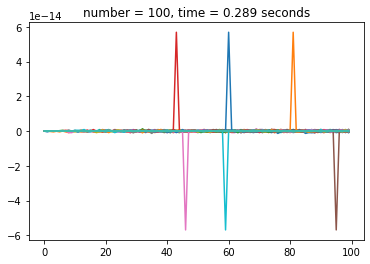

n = 120
time = 0.38530945777893066


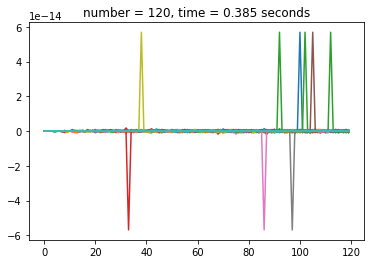

n = 140
time = 0.41376781463623047


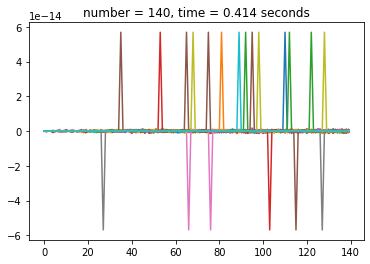

n = 160
time = 0.633857011795044


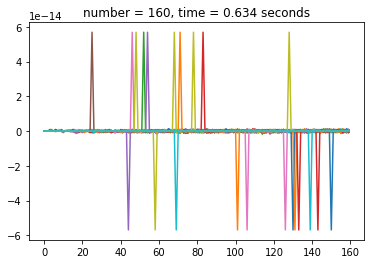

n = 180
time = 0.8682849407196045


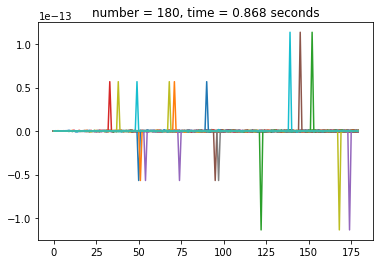

n = 200
time = 1.1730930805206299


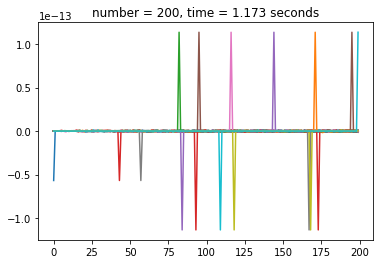

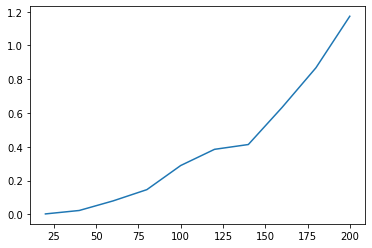

In [3]:
#n = int(input())
def Cholesky(A, L):
    L[0][0] = A[0][0] ** 0.5
    for i in range(n):
        L[i][0] = A[i][0]/L[0][0]
    for i in range(1, n):
        for j in range(1, i + 1):
            summ = 0
            if i == j:
                for k in range(j):
                    summ += L[i][k]*L[i][k]
                L[i][i] = (A[i][i] - summ) ** 0.5
            else:
                for k in range(j):
                    summ += L[i][k]*L[j][k]
                L[i][j] = (A[i][j] - summ) / L[j][j]
    return L

qTime = 0.0
n = 0
nList = []
qTimeList = []
while qTime <= 1.0:
    n += 20
    nList.append(n)
    A = np.random.uniform(0, n, (n, n)) * 10
    for i in range(n):
        for j in range(n):
            A[i][i] = A[i][i] + abs(A[i][j])
            A[i][j] = A[j][i]
    L = ln.cholesky(A)
    L1 = np.zeros((n, n))
    startTime = time.time()
    L1 = Cholesky(A, L1)
    qTime = time.time() - startTime
    qTimeList.append(qTime)
    print(f"n = {n}")
    print(f"time = {qTime}")
    fig, ax = plt.subplots()
    plt.title(f"number = {n}, time = {qTime:0.3f} seconds")
    ax.plot(L1-L)
    plt.show()
    if n % 40 == 0:
        fig.savefig(f"Cholesky_graphics/{n:3d}x{n:3d}.png")
fig, ax = plt.subplots()
ax.plot(nList, qTimeList)
plt.show()
fig.savefig("Cholecky_time_dependes_of_quantity.png")